1. **Can we use Bagging for regression problems?**

Yes, Bagging can be used for regression problems using models like Bagging Regressor, which aggregates predictions by averaging outputs from multiple regressors.

2. **What is the difference between multiple model training and single model training?**

Single model training uses one model to make predictions, while multiple model training combines predictions from several models (ensemble) to improve accuracy and robustness.

3. **Explain the concept of feature randomness in Random Forest**.

In Random Forest, feature randomness means that at each split in a tree, a random subset of features is selected instead of using all features, reducing correlation among trees.

4. **What is OOB (Out-of-Bag) Score?**

OOB score is an internal validation score in Bagging where each model is tested on the samples not included in its bootstrap sample, providing an unbiased performance estimate.

5. **How can you measure the importance of features in a Random Forest model?**

Feature importance is measured based on how much each feature decreases impurity across all trees (e.g., Gini impurity or information gain) or how much it impacts model accuracy.

6. **Explain the working principle of a Bagging Classifier**.

A Bagging Classifier trains multiple models on different bootstrap samples of the data and combines their outputs through majority voting for classification tasks.

7. **How do you evaluate a Bagging Classifier’s performance?**

You evaluate a Bagging Classifier using metrics like accuracy, precision, recall, F1-score, and OOB score or cross-validation on test data.

8. **How does a Bagging Regressor work?**

A Bagging Regressor trains multiple regressors on bootstrap samples and combines their outputs by averaging their predictions.

9. **What is the main advantage of ensemble techniques?**

The main advantage is improved performance—higher accuracy, reduced variance, and better generalization than individual models.

10. **What is the main challenge of ensemble methods?**

he main challenge is increased computational cost and complexity, including longer training times and difficulties in model interpretation.

11.** Explain the key idea behind ensemble techniques.**

The key idea is to combine multiple base models to reduce errors (bias, variance) and improve predictive performance.

12. **What is a Random Forest Classifier?**

It is an ensemble classifier that builds multiple decision trees using bootstrap samples and random subsets of features, and outputs the majority vote of trees.

13. **What are the main types of ensemble techniques?**

Bagging, Boosting, and Stacking are the main types.

14. **What is ensemble learning in machine learning?**

Ensemble learning combines predictions from multiple models to produce a better result than any single model could achieve alone.

15. **When should we avoid using ensemble methods?**

Avoid when interpretability is crucial, data is small, or computational resources are limited.

16. **How does Bagging help in reducing overfitting?**

Bagging reduces overfitting by averaging the predictions of multiple models trained on different data subsets, thus lowering model variance.

17. **Why is Random Forest better than a single Decision Tree?**

Random Forest reduces overfitting and improves accuracy by combining multiple decorrelated trees, whereas a single tree is prone to high variance.

18. **What is the role of bootstrap sampling in Bagging?**

Bootstrap sampling creates diverse training datasets by sampling with replacement, enabling each model in the ensemble to learn slightly different patterns.

19. **What are some real-world applications of ensemble techniques?**

Used in fraud detection, stock price prediction, customer churn modeling, medical diagnosis, recommendation systems, and image recognition.

20. **What is the difference between Bagging and Boosting?**

Bagging trains models independently in parallel to reduce variance; Boosting trains models sequentially, each correcting the previous to reduce bias.

In [42]:
from sklearn.datasets import load_breast_cancer, make_classification, make_regression
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split

# Bagging Classifier with Decision Trees
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bagging_clf.fit(X_train, y_train)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bagging_clf.predict(X_test)))

# Bagging Regressor with Decision Trees
Xr, yr = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, random_state=42)
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
bagging_reg.fit(Xr_train, yr_train)
print("Bagging Regressor MSE:", mean_squared_error(yr_test, bagging_reg.predict(Xr_test)))

# Random Forest Classifier on Breast Cancer
data = load_breast_cancer()
X_bc, y_bc = data.data, data.target
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_bc_train, y_bc_train)
print("Random Forest Feature Importances:", rf_clf.feature_importances_)

# Random Forest Regressor vs Decision Tree
Xr2, yr2 = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=42)
Xr2_train, Xr2_test, yr2_train, yr2_test = train_test_split(Xr2, yr2, random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(Xr2_train, yr2_train)
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(Xr2_train, yr2_train)
print("Random Forest Regressor MSE:", mean_squared_error(yr2_test, rf_reg.predict(Xr2_test)))
print("Decision Tree Regressor MSE:", mean_squared_error(yr2_test, dt_reg.predict(Xr2_test)))

# OOB Score for Random Forest Classifier
rf_oob = RandomForestClassifier(oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)
print("Random Forest OOB Score:", rf_oob.oob_score_)

# Bagging Classifier using SVM
bagging_svm = BaggingClassifier(estimator=SVC(), random_state=42)
bagging_svm.fit(X_train, y_train)
print("Bagging SVM Accuracy:", accuracy_score(y_test, bagging_svm.predict(X_test)))

# Random Forest Classifier with different numbers of trees
tree_counts = [10, 50, 100]
for n in tree_counts:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    print(f"Random Forest ({n} trees) Accuracy:", accuracy_score(y_test, model.predict(X_test)))

# Bagging Classifier using Logistic Regression and AUC
X_lr, y_lr = make_classification(n_samples=1000, n_features=20, random_state=42)
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, random_state=42)
bagging_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), random_state=42)
bagging_lr.fit(X_lr_train, y_lr_train)
probs = bagging_lr.predict_proba(X_lr_test)[:, 1]
print("Bagging Logistic Regression AUC:", roc_auc_score(y_lr_test, probs))

# Random Forest Regressor Feature Importances
rf_reg2 = RandomForestRegressor(random_state=42)
rf_reg2.fit(Xr2_train, yr2_train)
print("Random Forest Regressor Feature Importances:", rf_reg2.feature_importances_)

# Ensemble using Bagging and Random Forest Comparison
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
rf_model = RandomForestClassifier(random_state=42)
bag_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
print("Bagging Ensemble Accuracy:", accuracy_score(y_test, bag_model.predict(X_test)))
print("Random Forest Ensemble Accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))

Bagging Classifier Accuracy: 0.872
Bagging Regressor MSE: 8273.271886514716
Random Forest Feature Importances: [0.03971058 0.01460399 0.05314639 0.04277978 0.00816485 0.01140166
 0.08321459 0.0902992  0.00443533 0.00443395 0.01951684 0.00459978
 0.00868228 0.04355077 0.00464415 0.0036549  0.00701442 0.00504716
 0.00371411 0.00658253 0.08127686 0.01649014 0.07138828 0.12319232
 0.01033481 0.01580059 0.03174022 0.17229521 0.01310266 0.00518165]
Random Forest Regressor MSE: 6539.469019512989
Decision Tree Regressor MSE: 20284.894632064203
Random Forest OOB Score: 0.8986666666666666
Bagging SVM Accuracy: 0.864
Random Forest (10 trees) Accuracy: 0.876
Random Forest (50 trees) Accuracy: 0.876
Random Forest (100 trees) Accuracy: 0.88
Bagging Logistic Regression AUC: 0.9250241545893718
Random Forest Regressor Feature Importances: [0.14105685 0.23943402 0.00788402 0.00766927 0.17670226 0.00708001
 0.10986984 0.00853568 0.008289   0.00681718 0.00882835 0.02201699
 0.00862337 0.00811948 0.0092960

GridSearchCV Best Accuracy: 0.8893333333333334
Bagging Regressor (10 estimators) MSE: 10608.361178430006
Bagging Regressor (50 estimators) MSE: 9080.792318747119
Bagging Regressor (100 estimators) MSE: 9221.49953832794
Misclassified Samples Count: 30
Bagging Classifier Accuracy: 0.872
Decision Tree Classifier Accuracy: 0.84


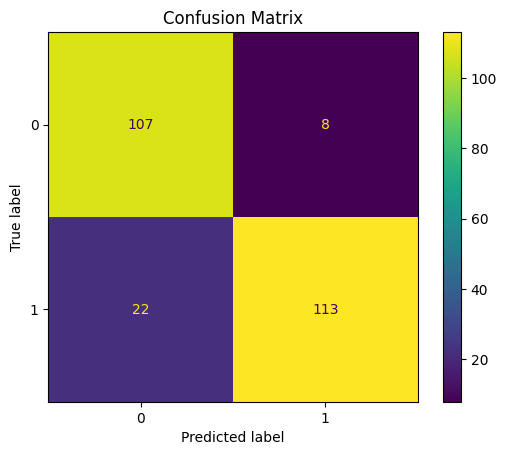

Stacking Classifier Accuracy: 0.872
Top 5 Features Indexes: [ 5 18  1 14 11]
Top 5 Feature Importances: [0.34714065 0.20155912 0.09249108 0.08034131 0.02870792]
Precision: 0.9256198347107438
Recall: 0.8296296296296296
F1 Score: 0.875
Max Depth 5 Accuracy: 0.864
Max Depth 10 Accuracy: 0.876
Max Depth None Accuracy: 0.88
Bagging Regressor (DT) MSE: 10608.361178430006
Bagging Regressor (KNN) MSE: 15650.790640273439
ROC-AUC Score: 0.9337520128824477
Cross-Validation Accuracy Scores: [0.95  0.9   0.895 0.895 0.86 ]


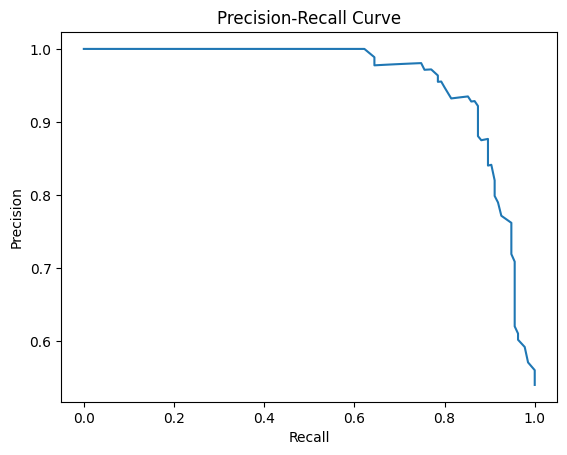

Stacking Classifier (RF + LR) Accuracy: 0.872
Bootstrap 0.5 MSE: 10789.601869988499
Bootstrap 0.7 MSE: 10086.316494167857
Bootstrap 1.0 MSE: 9080.792318747119


In [44]:
# Q1: Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.datasets import load_breast_cancer, make_classification, make_regression
from sklearn.ensemble import (
    BaggingClassifier, BaggingRegressor,
    RandomForestClassifier, RandomForestRegressor,
    StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, mean_squared_error, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

X_clf, y_clf = make_classification(n_samples=1000, n_features=20, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, random_state=42)

param_grid = {'n_estimators': [10, 50], 'max_depth': [None, 10]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_clf_train, y_clf_train)
print("GridSearchCV Best Accuracy:", grid.best_score_)

# Q2: Train a Bagging Regressor with different numbers of base estimators and compare performance
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, random_state=42)
for n in [10, 50, 100]:
    model = BaggingRegressor(n_estimators=n, random_state=42)
    model.fit(X_reg_train, y_reg_train)
    print(f"Bagging Regressor ({n} estimators) MSE:", mean_squared_error(y_reg_test, model.predict(X_reg_test)))

# Q3: Train a Random Forest Classifier and analyze misclassified samples
rf = RandomForestClassifier(random_state=42)
rf.fit(X_clf_train, y_clf_train)
y_pred = rf.predict(X_clf_test)
misclassified = np.where(y_pred != y_clf_test)[0]
print("Misclassified Samples Count:", len(misclassified))

# Q4: Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
bag_clf.fit(X_clf_train, y_clf_train)
dt_clf.fit(X_clf_train, y_clf_train)
print("Bagging Classifier Accuracy:", accuracy_score(y_clf_test, bag_clf.predict(X_clf_test)))
print("Decision Tree Classifier Accuracy:", accuracy_score(y_clf_test, dt_clf.predict(X_clf_test)))

# Q5: Train a Random Forest Classifier and visualize the confusion matrix
rf_cm = RandomForestClassifier(random_state=42)
rf_cm.fit(X_clf_train, y_clf_train)
y_cm_pred = rf_cm.predict(X_clf_test)
ConfusionMatrixDisplay.from_predictions(y_clf_test, y_cm_pred)
plt.title("Confusion Matrix")
plt.show()

# Q6: Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
estimators = [('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True)), ('lr', LogisticRegression())]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_clf_train, y_clf_train)
print("Stacking Classifier Accuracy:", accuracy_score(y_clf_test, stack.predict(X_clf_test)))

# Q7: Train a Random Forest Classifier and print the top 5 most important features
rf_feat = RandomForestClassifier(random_state=42)
rf_feat.fit(X_clf_train, y_clf_train)
importances = rf_feat.feature_importances_
top5 = np.argsort(importances)[-5:][::-1]
print("Top 5 Features Indexes:", top5)
print("Top 5 Feature Importances:", importances[top5])

# Q8: Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
bag_metrics = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag_metrics.fit(X_clf_train, y_clf_train)
y_pred_metrics = bag_metrics.predict(X_clf_test)
print("Precision:", precision_score(y_clf_test, y_pred_metrics))
print("Recall:", recall_score(y_clf_test, y_pred_metrics))
print("F1 Score:", f1_score(y_clf_test, y_pred_metrics))

# Q9: Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
for depth in [5, 10, None]:
    rf_depth = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_depth.fit(X_clf_train, y_clf_train)
    print(f"Max Depth {depth} Accuracy:", accuracy_score(y_clf_test, rf_depth.predict(X_clf_test)))

# Q10: Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
br_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
br_knn = BaggingRegressor(estimator=KNeighborsRegressor(), random_state=42)
br_dt.fit(X_reg_train, y_reg_train)
br_knn.fit(X_reg_train, y_reg_train)
print("Bagging Regressor (DT) MSE:", mean_squared_error(y_reg_test, br_dt.predict(X_reg_test)))
print("Bagging Regressor (KNN) MSE:", mean_squared_error(y_reg_test, br_knn.predict(X_reg_test)))

# Q11: Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
rf_auc = RandomForestClassifier(random_state=42)
rf_auc.fit(X_clf_train, y_clf_train)
y_probs = rf_auc.predict_proba(X_clf_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_clf_test, y_probs))

# Q12: Train a Bagging Classifier and evaluate its performance using cross-validation
bag_cv = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
cv_scores = cross_val_score(bag_cv, X_clf, y_clf, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)

# Q13: Train a Random Forest Classifier and plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_clf_test, y_probs)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Q14: Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
stack2 = StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('lr', LogisticRegression())], final_estimator=LogisticRegression())
stack2.fit(X_clf_train, y_clf_train)
print("Stacking Classifier (RF + LR) Accuracy:", accuracy_score(y_clf_test, stack2.predict(X_clf_test)))

# Q15: Train a Bagging Regressor with different levels of bootstrap samples and compare performance
for b in [0.5, 0.7, 1.0]:
    model = BaggingRegressor(n_estimators=50, max_samples=b, random_state=42)
    model.fit(X_reg_train, y_reg_train)
    print(f"Bootstrap {b} MSE:", mean_squared_error(y_reg_test, model.predict(X_reg_test)))